In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.shape

(41188, 21)

In [9]:
####remove duplicated rows or columns
df = df.drop_duplicates(keep='first')
df = df.loc[:,~df.columns.duplicated()]
df.shape

(41176, 21)

In [10]:
cat_feats = [col for col in df.columns\
             if df[col].dtypes=='object']
num_feats = [col for col in df.columns\
            if df[col].dtypes!='object']
print('number of categorical features:',len(cat_feats))
print('number of numeric features:',len(num_feats))

number of categorical features: 11
number of numeric features: 10


In [11]:
Cat_List = {}
for cat in cat_feats:
    Cat_List[cat] = df[cat].nunique()

In [12]:
Cat_List

{'job': 12,
 'marital': 4,
 'education': 8,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'contact': 2,
 'month': 10,
 'day_of_week': 5,
 'poutcome': 3,
 'y': 2}

In [13]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [14]:
df = df.replace(to_replace ="unknown",value = np.nan)

In [15]:
null_df = df.isnull().sum().reset_index()
null_df.columns = ['Features','Nbr_Null']
null_df['Pct_Null'] = round(100*null_df['Nbr_Null']/df.shape[0],2)

In [16]:
null_df

,Features,Nbr_Null,Pct_Null
0,age,0,0.00
1,job,330,0.80
2,marital,80,0.19
3,education,1730,4.20
4,default,8596,20.88
5,housing,990,2.40
6,loan,990,2.40
7,contact,0,0.00
8,month,0,0.00
9,day_of_week,0,0.00


In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Calculate Conversion Rate

In [18]:
###encoder output variable
df['conversion'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)
print('total conversions: {0} out of {1}'.format(df.conversion.sum(),df.shape[0]))
print('conversion rate: {:.2%}'.format((df.conversion.sum() / df.shape[0])))

total conversions: 4639 out of 41176
conversion rate: 11.27%


# Which age group returns the maximum conversion rate?

In [19]:
conversions_by_age = df.groupby('age')['conversion'].sum()
nbr_customers_by_age = df.groupby('age')['conversion'].count()
conversion_rate_by_age = conversions_by_age/nbr_customers_by_age*100

In [20]:
conversion_rate_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

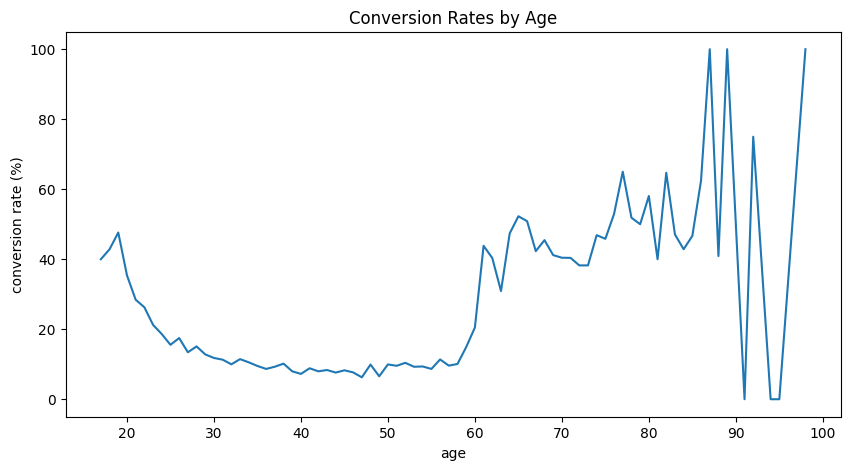

In [21]:
####Visualize conversion rates across different ages
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,4))
conversion_rate_by_age.plot(kind='line',figsize=[10,5])
ax.set_title('Conversion Rates by Age')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [22]:
df['age_range'] = pd.cut(df['age'],bins=[0,17,24,40,60,100])
df['age_range'].value_counts()

(24, 40]     22694
(40, 60]     16506
(17, 24]      1062
(60, 100]      909
(0, 17]          5
Name: age_range, dtype: int64

In [23]:
conversions_by_age = df.groupby('age_range')['conversion'].sum()
nbr_customers_by_age = df.groupby('age_range')['conversion'].count()
conversion_rate_by_age = conversions_by_age/nbr_customers_by_age*100

<AxesSubplot: xlabel='age_range'>

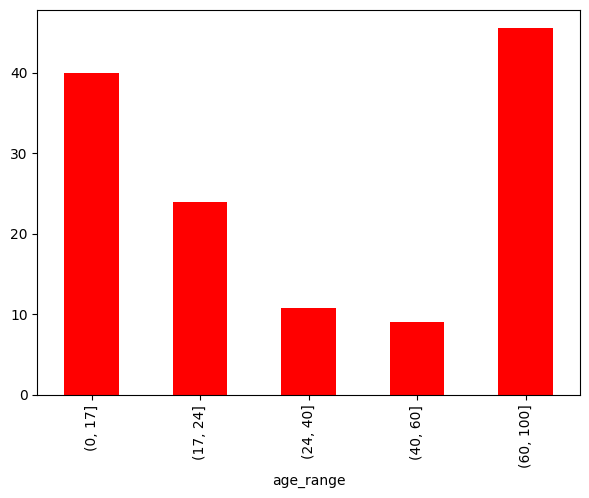

In [24]:
conversion_rate_by_age.plot(kind='bar',figsize=[7,5],color='red')

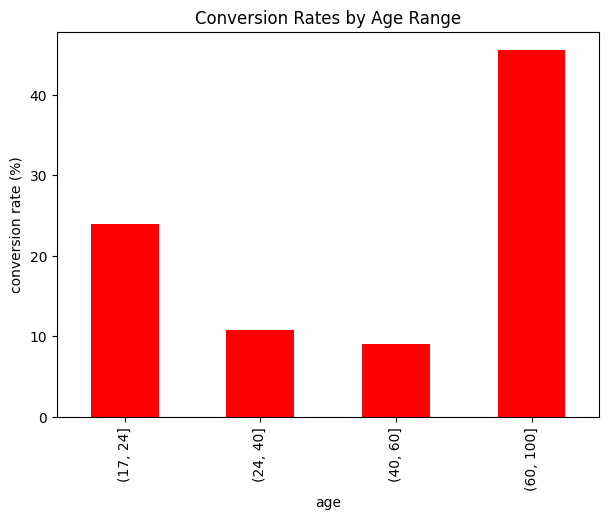

In [25]:
fig, ax = plt.subplots(figsize=(10,4))
conversion_rate_by_age.loc[conversion_rate_by_age.index.categories[1:]]\
.plot(kind='bar',figsize=[7,5],color='red')
# conversion_rate_by_age.plot(kind='bar',figsize=[7,5])
ax.set_title('Conversion Rates by Age Range')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

# Conversion versus non-conversions

In [26]:
conversion_by_maritalstatus = pd.pivot_table(df,values='y',index='marital'\
               ,columns='conversion',aggfunc=len)

In [27]:
conversion_by_maritalstatus

conversion,0,1
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620


In [28]:
# conversion_by_maritalstatus['Total'] = conversion_by_maritalstatus.sum(axis=1)

array([<AxesSubplot: ylabel='0'>, <AxesSubplot: ylabel='1'>], dtype=object)

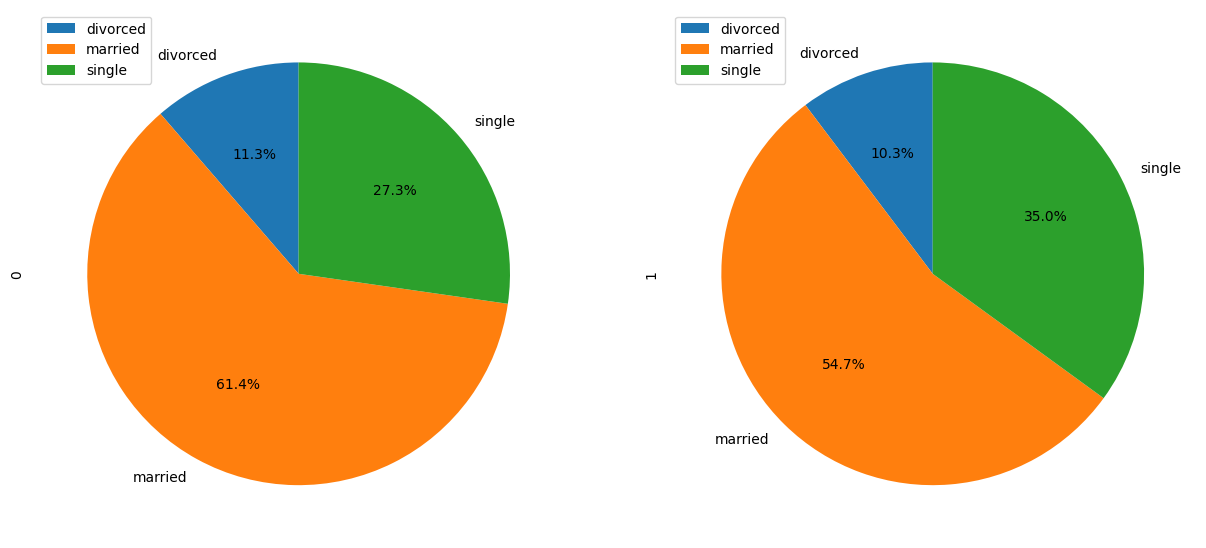

In [29]:
###visualize using pie chart
conversion_by_maritalstatus.plot(kind='pie',subplots=True,\
                                figsize = (15,7),startangle=90,\
                                autopct = lambda x: '%0.1f%%' %x)

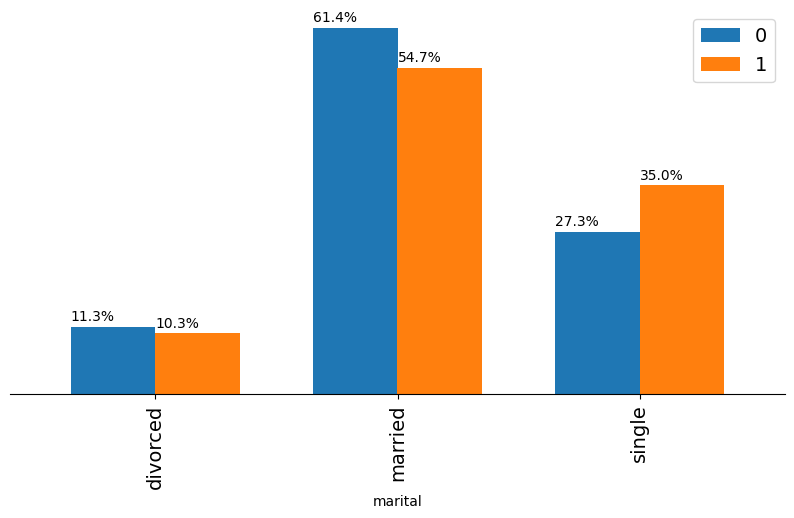

In [30]:
# colors_list = ['grey','#d9534f']
ax = (conversion_by_maritalstatus.div(conversion_by_maritalstatus.sum(0), axis=1))\
.plot(kind='bar',figsize=(10,5),\
                                                                                        width = 0.7,\
                                                                                        edgecolor=None)
plt.legend(labels=conversion_by_maritalstatus.columns,fontsize= 14)
plt.xticks(fontsize=14)
for location in ['left','right','top']:
    ax.spines[location].set_visible(False)
    ax.set_yticks([])
    # Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))

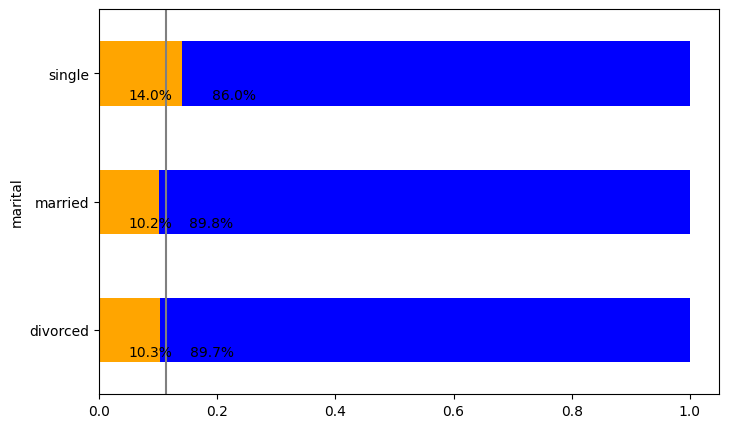

In [31]:
conversion_by_maritalstatus = conversion_by_maritalstatus[[1,0]]
ax = conversion_by_maritalstatus.div(conversion_by_maritalstatus\
                                .sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[8,5],color=['orange','blue'])
ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
plt.vlines(0.1127,-0.7,len(conversion_by_maritalstatus),color='grey')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

In [32]:
def get_visualization(feature,target):
    conversion_by_maritalstatus = pd.pivot_table(df,values=target,index=feature\
               ,columns='conversion',aggfunc=len)
    ax = (conversion_by_maritalstatus.div(conversion_by_maritalstatus.sum(0), axis=1)).plot(kind='bar',figsize=(10,5),\
                                                                                        width = 0.7,\
                                                                                        edgecolor=None)
    plt.legend(labels=conversion_by_maritalstatus.columns,fontsize= 14)
    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.yticks([])
#     plt.hlines(0.1126,-0.5,len(list(rotation_province.keys())))
    # Add this loop to add the annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))

In [33]:
def get_stacked_bar_chart(feature,target):
    conversion_by_maritalstatus = pd.pivot_table(df,values=target,index=feature\
               ,columns='conversion',aggfunc=len)
    ax = conversion_by_maritalstatus.div(conversion_by_maritalstatus\
                                .sum(axis=1),axis=0).plot(kind='barh',stacked=True,figsize=[8,5])
    ax.get_legend().remove()####remove the legend. We can you also ax.get_legend().set_visible(False)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(width),(x+0.05,y+0.05))

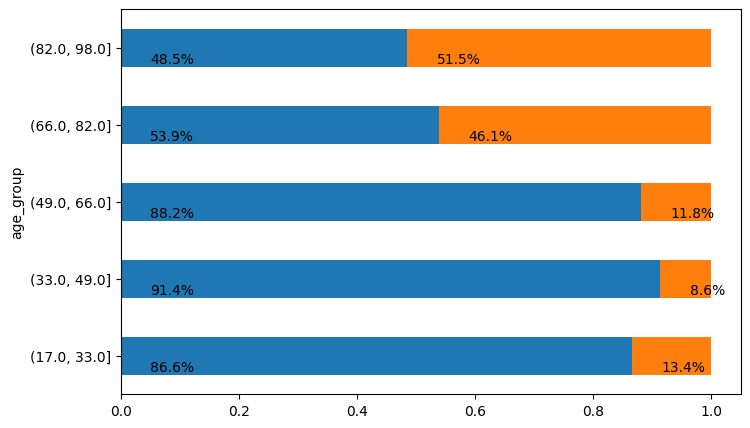

In [34]:
df['age_group'] = pd.cut(df['age'],bins=5,precision=0)
get_stacked_bar_chart('age_group','y')

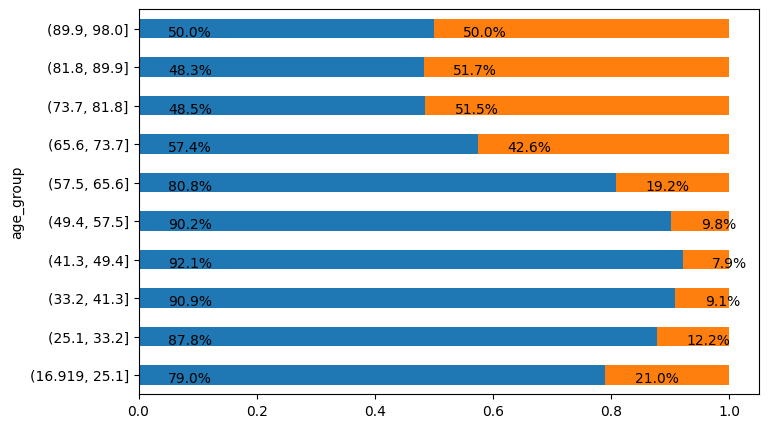

In [35]:
df['age_group'] = pd.cut(df['age'],bins=10)
get_stacked_bar_chart('age_group','y')

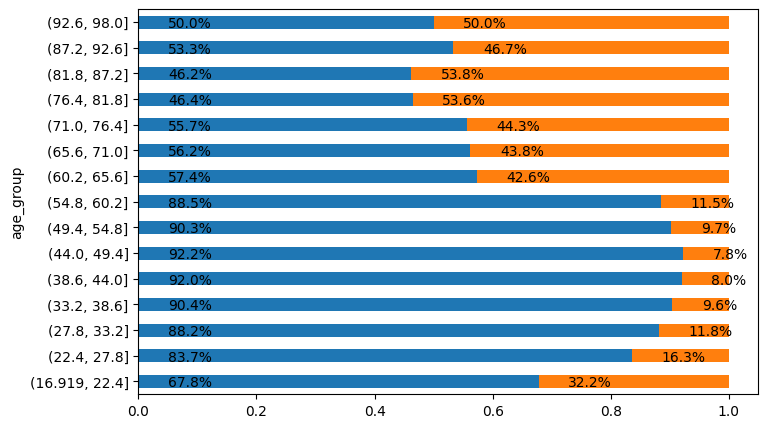

In [36]:
df['age_group'] = pd.cut(df['age'],bins=15)
get_stacked_bar_chart('age_group','y')

# Does job titles affect conversion rate?

In [37]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

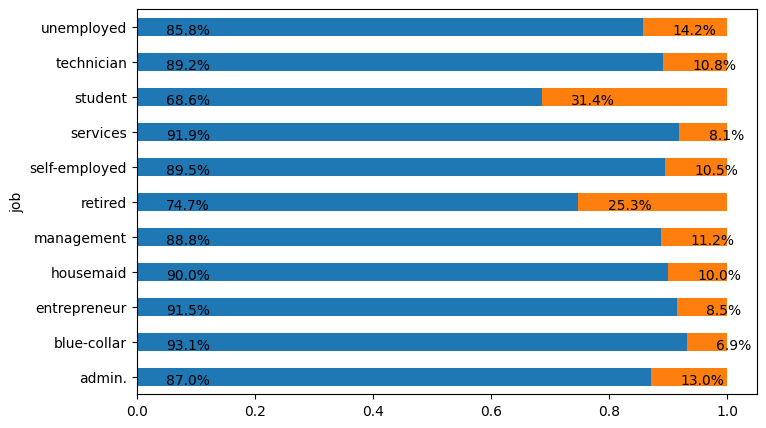

In [38]:
get_stacked_bar_chart('job','y')

Quite interesting: The customer group that does not generate income has a high response rate.

# Does education affect conversion rate?


In [39]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

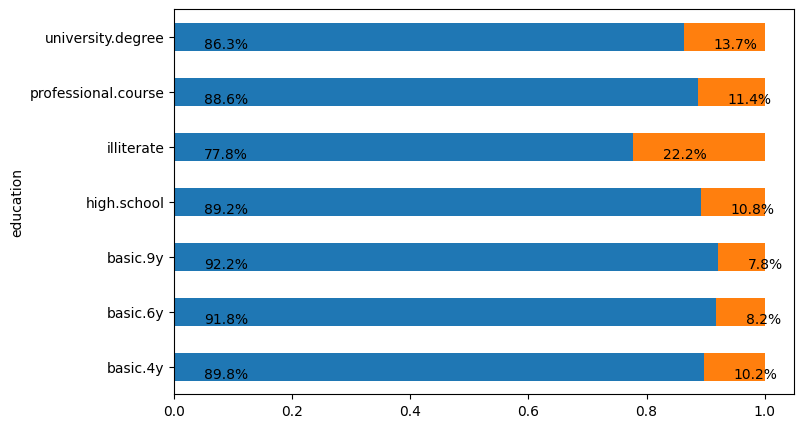

In [40]:
get_stacked_bar_chart('education','y')

# What type of contact we should contact with our customers


In [41]:
df.contact.value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

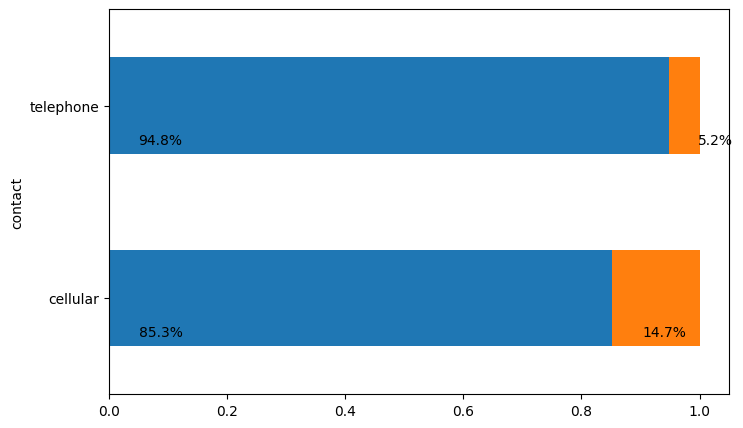

In [42]:
get_stacked_bar_chart('contact','y')

# Should we recontact  the client?


In [43]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'conversion',
       'age_range', 'age_group'],
      dtype='object')

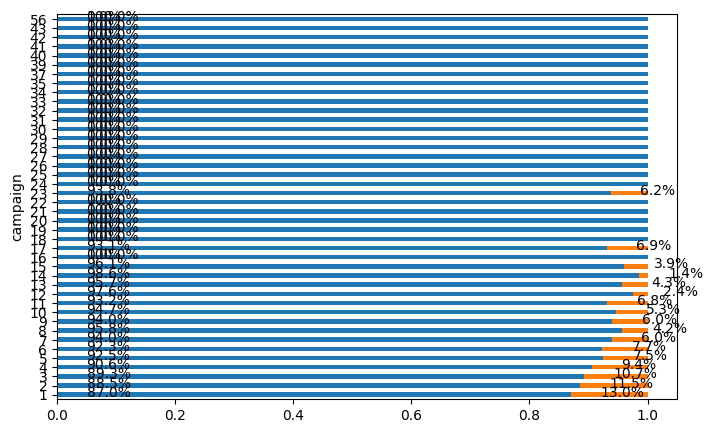

In [44]:
get_stacked_bar_chart('campaign','y')

In [45]:
df['campaign_T'] = df['campaign']
>= 7 -> '+7'

SyntaxError: invalid syntax (2829245067.py, line 2)

In [ ]:
df['campaign'].value_counts() 

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [ ]:
df['campaign_T'] = df['campaign'].apply(lambda x: '7+' if x>=7 else x)

In [ ]:
df['campaign_T'] = pd.cut(df['campaign'],bins=[0,1,2,3,4,5,6,40],labels = ['1','2','3','4','5','6','7+'])
df['campaign_T'].value_counts()

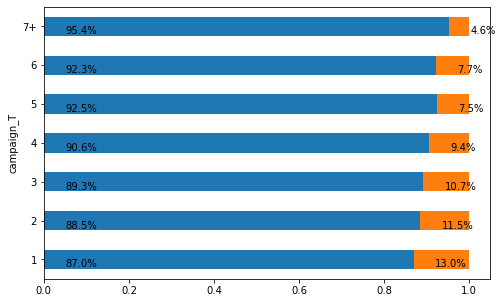

In [ ]:
get_stacked_bar_chart('campaign_T','y')

# How long the optimal duration of a call


In [ ]:
df['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

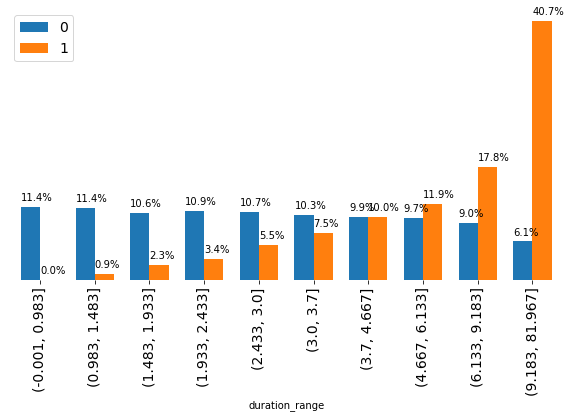

In [ ]:
df['duration_range'] = pd.qcut(df['duration']/60,10)
get_visualization('duration_range','y')

chi nen goi lai doi voi nhung khach hang ma last contact keo dai tu 3.7 phut tro len. Take Action đối với telesale: cố gắng dẫn dắt câu chuyện để khách hàng có thể kiên nhẫn lắng nghe lời chào mời sản phẩm. 

# Analysis Social and Economics context: homework

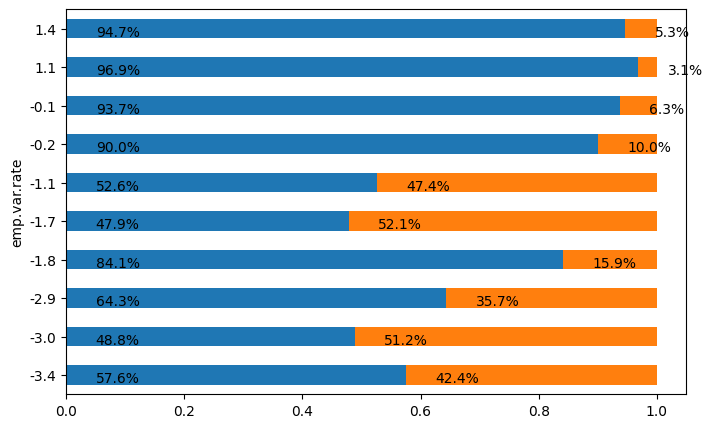

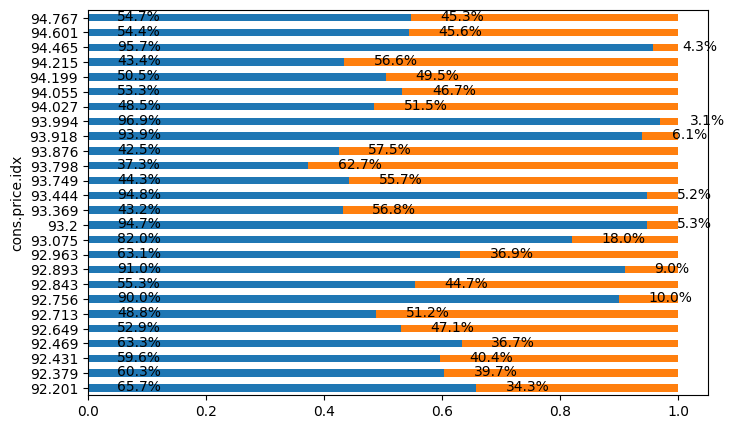

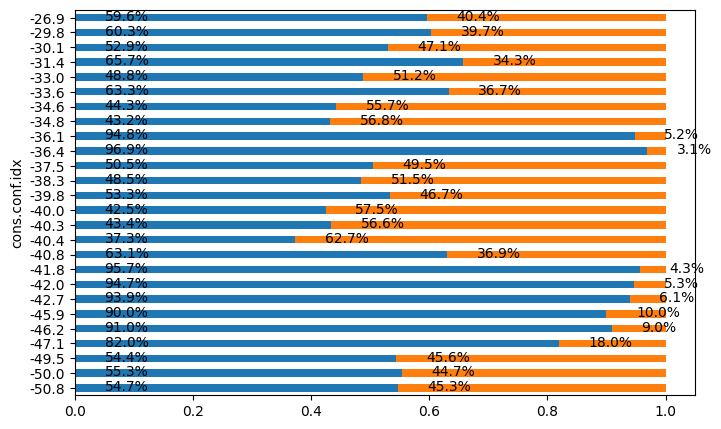

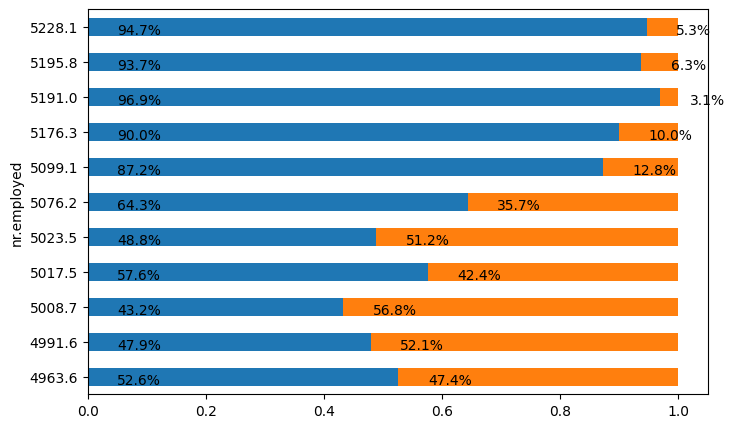

In [48]:
for field in ['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed']:
    get_stacked_bar_chart(field,'y')

In [50]:
df['euribor3m'] = pd.cut(df['euribor3m'],bins=15)
get_stacked_bar_chart('euribor3m','y')

TypeError: Categorical.min() takes 1 positional argument but 2 were given

---

# W4: Modeling
Độc lập với phần trước 


Xem code bên file mkt vì data bản này đang thay đổi

In [51]:
# Xử lí feature education trước -> Stats model
df.education

0                   basic.4y
1                high.school
2                high.school
3                   basic.6y
4                high.school
                ...         
41183    professional.course
41184    professional.course
41185      university.degree
41186    professional.course
41187    professional.course
Name: education, Length: 41176, dtype: object

In [53]:
df.education.value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

- Comments:
basic 3 giá trị -> gộp
illiterate 18 bản -> quá ít, không có giá trị -> xóa hoặc gộp nhóm khác
- Encoding:
không thứ bậc (vd: tỉnh thành) -> OneHot
thứ bậc

In [54]:
df['default'].value_counts()
# chuyển yes thành unknown

no     32577
yes        3
Name: default, dtype: int64